# 日夜图像分类器
---

日夜图像数据集由200个RGB彩色图像组成，分为两类：白天图像和夜晚图像。每个例子都有相同的数字：100个日图像和100个夜图像。

我们希望建立一个分类器，可以把这些图像准确地标记为白天或黑夜。要完成这个任务，我们需要找出这两种图像之间的显著性特征！

*注：所有图像都来自 [AMOS 数据集](http://cs.uky.edu/~jacobs/datasets/amos/) （众多户外场景档案）。*


### 导入资源

在开始使用项目代码之前，请导入你需要的库和资源。

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## 训练并测试数据
200张日/夜的图像被分成训练和测试数据集。

* 这些图像中的60％是训练图像，供你在创建分类器时使用。
* 另外40％是测试图像，将用于测试分类器的准确度。

首先，我们设置一些变量来跟踪图像的存储位置：

image_dir_training: the directory where our training image data is stored
image_dir_test: the directory where our test image data is stored


In [2]:
# Image data directories
image_dir_training = "../day_night_images/training/"
image_dir_test = "../day_night_images/test/"

## Load the datasets

## 加载数据集

前几行代码将加载训练日/夜图像，并将它们全部存储在变量`IMAGE_LIST`中。 该列表包含图像及其相关标签（“日”或“夜”）。

例如， `IMAGE_LIST` 中的第一个图像标签对可以通过索引

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## 构建输入图像和输出标签的`STANDARDIZED_LIST` 函数 

该函数将输入一个图像标签对列表，并输出一个包含调整过的图像和数字标签的**标准**列表。

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## 将标准化数据可视化

显示一个来自STANDARDIZED_LIST的标准化图片。

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


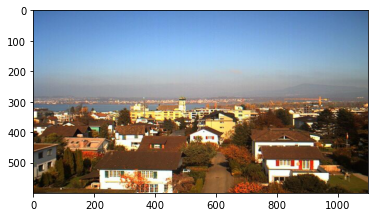

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))



# 特征提取

创建一个表示图像亮度的特征。我们将使用HSV颜色空间提取**平均亮度**。具体来说，我们将使用V通道（亮度测量），将V通道中的像素值相加，然后将该总和除以图像的面积，从而获得该图像的平均值。


---
###  使用V通道查找平均亮度

该函数会输入 **标准化** 的RGB图像并返回一个代表图像亮度平均水平的特征（单个值）。我们将使用此值将图像分类为白天或夜晚。

In [6]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

Avg brightness: 72.64436818181818


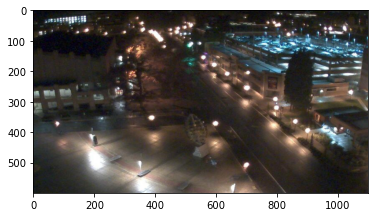

In [7]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

# 分类和可视化误差

在本节中，我们将把我们的平均亮度特征转换为一个分类器，该分类器输入一个标准化图像并返回该图像的一个`predicted_label`。这个 `estimate_label` 函数应该返回一个值：0或1（分别代表夜晚或白天）。

---
### TODO: 建立一个完整的分类器 

请设置一个根据平均亮度区分日/夜图像的阈值。

In [8]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    ## TODO: extract average brightness feature from an RGB image 
    # Use the avg brightness feature to predict a label (0, 1)

    ## TODO: set the value of a threshold that will separate day and night images
    
    ## TODO: Return the predicted_label (0 or 1) based on whether the avg is 
    # above or below the threshold
    
    return 0 if avg_brightness(rgb_image) < 120 else 1    
    

estimate is 1
true is 1


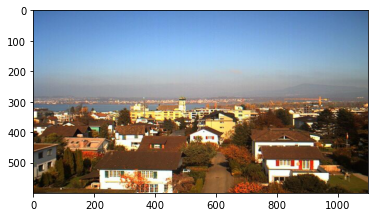

In [10]:
## Test out your code by calling the above function and seeing 
# how some of your training data is classified
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]

estimate = estimate_label(test_im)

print("estimate is " + str(estimate))
print("true is " + str(STANDARDIZED_LIST[image_num][1]))
plt.imshow(test_im)
